In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Generate Synthetic Data
***

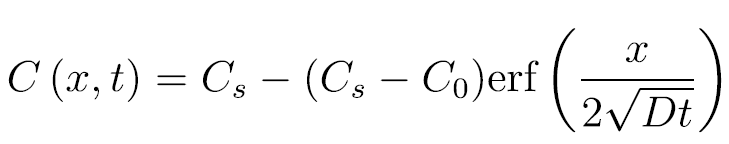
***

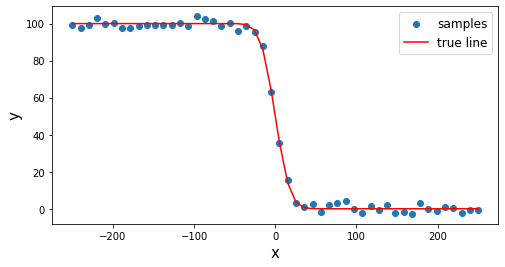

In [70]:
import math
from scipy import special

# known parameters 
Cs = 50
C0 = 0
t = 200

# unobserved parameter/ parameter to be estimated
D = 0.5

# Generate toy experimental data
num_points = 50
x_vals = np.linspace(-250, 250, num_points)
C_vals = Cs - (Cs-C0)*special.erf(x_vals/(2*math.sqrt(D*t)))
y_vals = C_vals + np.random.normal(scale=2, size=num_points)

plt.figure(figsize=(8,4))
p1 = plt.scatter(x_vals, y_vals)
p2, = plt.plot(x_vals, C_vals, color='r')
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.legend((p1, p2), ('samples', 'true line'), fontsize=12)

# Grid Approximation Method
***

Text(0.5, 1.0, 'True value: 0.5\nMLE: 0.52')

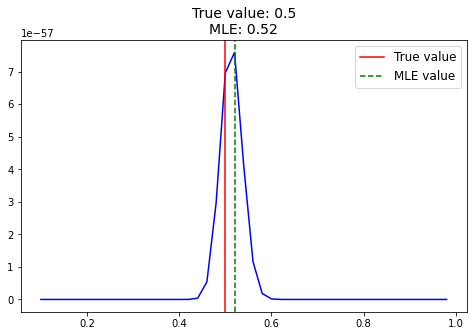

In [71]:
from scipy.stats import multivariate_normal

# grid for the unobserved parameter/ parameter to be estimated
D_vals = np.arange(0.1, 1, 0.02)

# calculate likelihood of observing the experimental data for each point from the grid
likelihood = []
for item in D_vals:
  C_vals = Cs - (Cs-C0)*special.erf(x_vals/(2*math.sqrt(item*t)))
  likelihood.append(multivariate_normal.pdf(y_vals, C_vals, np.identity(num_points)))

# identify MLE for the unobserved parameter/ parameter to be estimated
chosen_idx = likelihood.index(max(likelihood))
MLE = round(D_vals[chosen_idx],4)

plt.figure(figsize=(8,5))
plt.plot(D_vals, likelihood, color='b')
true_D = plt.axvline(D, color='r', linestyle='-')
mle_D = plt.axvline(MLE, color='g', linestyle='--')
plt.legend((true_D, mle_D), ('True value', 'MLE value'), fontsize=12)
plt.title('True value: %s\nMLE: %s'%(D,MLE), fontsize=14)